# KuaiRec数据集
KuaiRec数据集是基本全交互的数据集，数据集比KuaiRand更小

In [1]:
import numpy as np
import pandas as pd
import ast
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import warnings; warnings.simplefilter('ignore')
print("environment checked!")

environment checked!


 KuaiRec
  ├── data
  │   ├── big_matrix.csv            大矩阵，密度16.3%
  │   ├── small_matrix.csv          小矩阵，密度99.6%
  │   ├── social_network.csv        好友列表
  │   ├── user_features.csv         用户特征
  │   ├── item_daily_features.csv   视频当日数据
  │   └── item_categories.csv       视频类别标签

加载路径

In [2]:
data_path = "F:/DataSets/KuaiRec/KuaiRec 2.0/data/"
item_categories_path = data_path + "item_categories.csv"

In [3]:
item_categories = pd.read_csv(item_categories_path)
item_categories["feat"] = item_categories["feat"].map(eval)
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


## 可视化方法

In [4]:
def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()
def visual_trend_change(date_feat_counts, bottom = 0, top = 31, xlabel = "date", ylabel = "unique_feats"):
    # 创建图形和轴对象
    fig, ax = plt.subplots(figsize=(12, 4.5))
    
    # 使用索引作为x值
    x = np.arange(len(date_feat_counts))
    
    # 绘制直方图
    bars = ax.bar(x, date_feat_counts[ylabel], color='skyblue')
    
    # 绘制折线图
    ax.plot(x, date_feat_counts[ylabel], 'r-o', label='Trend Line')
    
    # 设置x轴的标签
    ax.set_xticks(x)
    ax.set_xticklabels(date_feat_counts[xlabel], rotation=45)
    
    # 设置y轴的范围
    ax.set_ylim(bottom, top)
    
    # 在直方图的每个顶部显示具体数值
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(i, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # 设置坐标轴标签
    ax.set_xlabel('Date')
    ax.set_ylabel('feat')
    
    # 显示图例
    ax.legend()
    
    # 显示图形
    plt.tight_layout()  # 调整图形以适应标签
    plt.show()


## 统计视频的类别数
大矩阵应该全，小矩阵应该不全
有31个视频标签

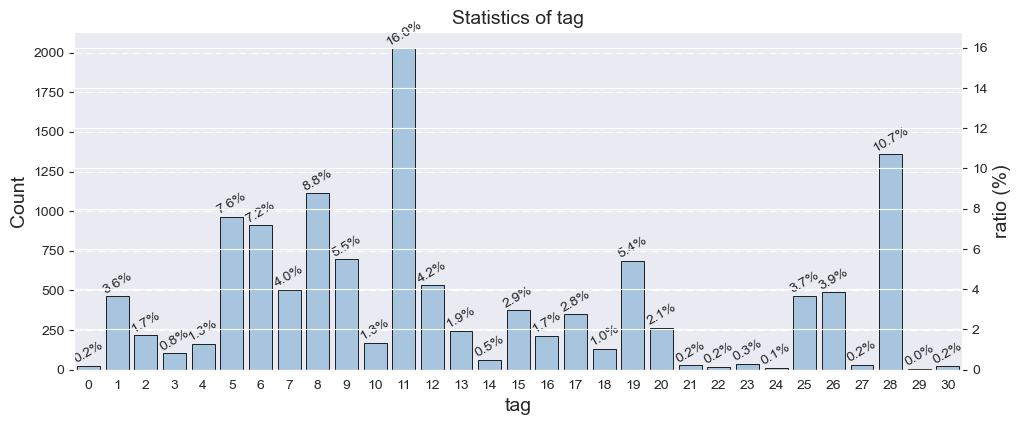

In [5]:
cnt = item_categories.feat.map(Counter)
cnt_all = Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

## 统计大矩阵的用户使用时段

In [6]:
big_data_path = data_path + "big_matrix.csv"
big_data = pd.read_csv(big_data_path)
big_data.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [7]:
big_data.describe()

,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07
mean,3.574377e+03,5.057748e+03,9.027027e+03,1.462157e+04,2.020080e+07,1.596799e+09,9.445059e-01
std,2.067008e+03,3.089868e+03,1.547343e+04,1.983474e+04,5.080192e+01,1.514698e+06,1.674601e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,2.020070e+07,1.592872e+09,0.000000e+00
25%,1.788000e+03,2.387000e+03,4.218000e+03,7.434000e+03,2.020080e+07,1.596339e+09,3.148246e-01
50%,3.578000e+03,4.822000e+03,7.277000e+03,9.636000e+03,2.020081e+07,1.596669e+09,7.234710e-01
75%,5.343750e+03,7.600000e+03,1.035000e+04,1.217900e+04,2.020083e+07,1.598502e+09,1.177644e+00
max,7.175000e+03,1.072700e+04,9.996390e+05,3.150720e+05,2.020090e+07,1.599694e+09,5.734571e+02


日期从2020.7.5到2020.9.5，为期2个月，但只有28天的数据，分为3个观察窗

In [8]:
print(big_data.date.min())
print(big_data.date.max())
print(len(big_data['date'].value_counts()))

20200705
20200905
28


## 统计类别变化怎么统计？
只有1级类别

### 系统覆盖率
步骤：
1. 大矩阵，根据video_id，在item_categories找到对应的视频标签
2. 按照date排序，统计相同date中，unique_feat的个数 

In [9]:
origin_data = pd.merge(big_data, item_categories, on='video_id', how='left')
# print(origin_data.head())
feature = ["date", "video_id", "user_id", "feat"]
merged_data = origin_data[feature]
merged_data.head()

,date,video_id,user_id,feat
0,20200705,3649,0,[9]
1,20200705,9598,0,[28]
2,20200705,5262,0,[25]
3,20200705,1963,0,"[9, 28]"
4,20200705,8234,0,[6]


In [10]:
print(type(merged_data['feat'].iloc[0]))

<class 'list'>


In [11]:
# 展开feat列中的列表到新的行
exploded_data = merged_data.explode('feat')
# exploded_data.head()
# 按date分组，并计算每个日期的唯一feat数
date_feat_counts = exploded_data.groupby('date')['feat'].nunique().reset_index()
date_feat_counts.columns = ['date', 'unique_feats']
date_feat_counts.describe()

,date,unique_feats
count,2.800000e+01,28.00000
mean,2.020080e+07,30.50000
std,6.795006e+01,0.83887
min,2.020070e+07,28.00000
25%,2.020071e+07,30.00000
50%,2.020081e+07,31.00000
75%,2.020083e+07,31.00000
max,2.020090e+07,31.00000


In [12]:
date_feat_counts["date"] -= 20200000
date_feat_counts.head()

,date,unique_feats
0,705,28
1,706,29
2,707,29
3,708,29
4,709,30


就算以每天为一个观察窗口，基本类别覆盖率没有变化，最小28最大31，即最小90%，最大100%
甚至是增长趋势

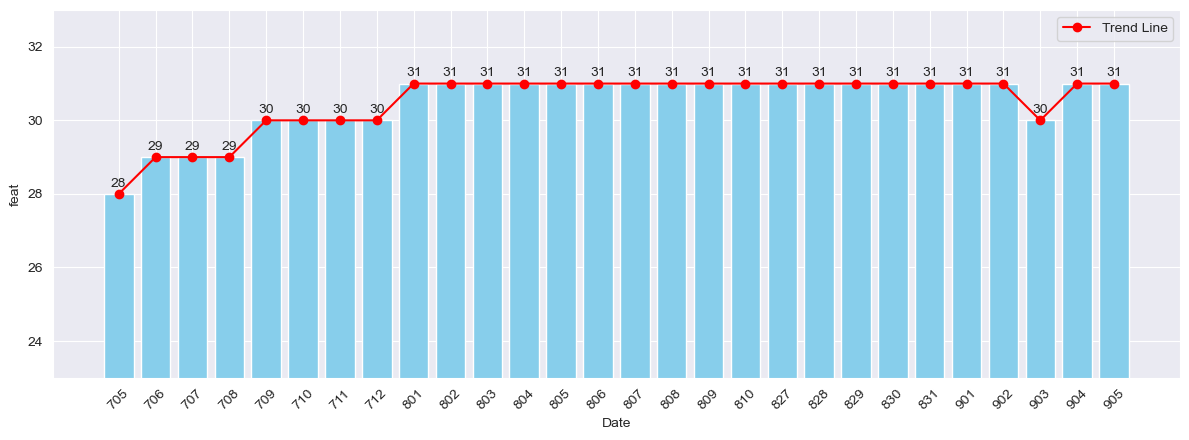

In [13]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 4.5))

# 使用索引作为x值
x = np.arange(len(date_feat_counts))

# 绘制直方图
bars = ax.bar(x, date_feat_counts['unique_feats'], color='skyblue')

# 绘制折线图
ax.plot(x, date_feat_counts['unique_feats'], 'r-o', label='Trend Line')

# 设置x轴的标签
ax.set_xticks(x)
ax.set_xticklabels(date_feat_counts['date'], rotation=45)

# 设置y轴的范围
ax.set_ylim(23, 33)

# 在直方图的每个顶部显示具体数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(i, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# 设置坐标轴标签
ax.set_xlabel('Date')
ax.set_ylabel('feat')

# 显示图例
ax.legend()

# 显示图形
plt.tight_layout()  # 调整图形以适应标签
plt.show()


### 系统饼图
步骤：
1. 挑三天，705  805 905
2. 每天的类别画饼图，共计3个饼图

结论，从系统宏观，也看不出过滤器泡

In [14]:
def count_label(origin_data,chosen_user_id = 0, type = 0):
    if(type == 1):
        origin_data = origin_data[origin_data["user_id"] == chosen_user_id]
    
    # 扩展feat列并创建一列为date，一列为feat的DataFrame
    expanded_data = origin_data.explode('feat')
    # 创建一个以date为行，以0到30为列的新DataFrame，初始填充为0
    unique_dates = expanded_data['date'].unique()
    label_counts = pd.DataFrame(index=unique_dates, columns=range(31)).fillna(0)
    
    # 遍历每个日期，统计每个标签出现的次数并填充到新的DataFrame中
    for date in unique_dates:
        # 临时DataFrame，仅包含当前日期的数据
        temp_df = expanded_data[expanded_data['date'] == date]
        # 统计当前日期的标签出现次数
        counts = temp_df['feat'].value_counts()
        # 填充结果到label_counts对应的位置
        label_counts.loc[date, counts.index] = counts.values
    
    # 重设索引名称
    label_counts.index.name = 'date'
    
    # 将索引转换为列
    label_counts = label_counts.reset_index()
    return label_counts
    # 查看结果
    # label_counts.head()

In [15]:
def draw_pie(row_data, figsize=(10, 10), textprops={'fontsize': 12}):
    # 预定义的颜色列表，确保有31种不同的颜色
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
        '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
        '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939',
        '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39',
        '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b',
        '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6'
    ]

    # 过滤掉数量为0的标签
    # row_data = row_data[row_data > 0]
    labels = row_data.index.astype(str)  # 确保标签是字符串类型
    sizes = row_data.values
    
    # 检查是否有数据绘图
    if len(sizes) > 0:
        # 绘制饼图
        plt.figure(figsize=figsize)
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops=textprops)
        plt.axis('equal')  # 确保饼图是圆形的
        plt.title('Label Distribution for Date {}'.format(row_data.name), fontsize=textprops['fontsize'] + 2)
        plt.show()
    else:
        print(f"No label data available for date {row_data.name}.")


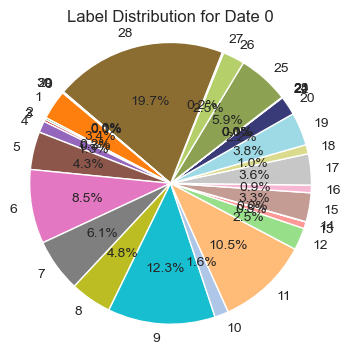

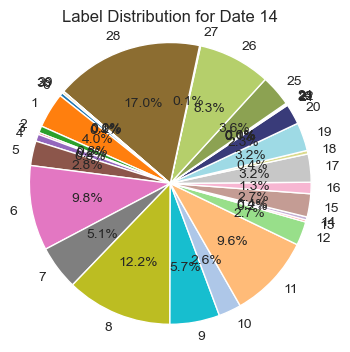

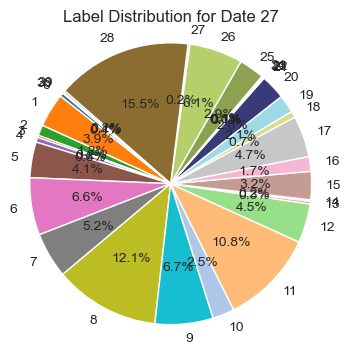

In [16]:
# 假设我们要绘制的是label_counts中第一行的数据
label_counts = count_label(origin_data)
row_data_to_plot_0 = label_counts.iloc[0, 1:]  # 跳过第一列（日期列）
row_data_to_plot_1 = label_counts.iloc[14, 1:]  # 跳过第一列（日期列）
row_data_to_plot_2 = label_counts.iloc[27, 1:]  # 跳过第一列（日期列）

draw_pie(row_data_to_plot_0, figsize=(4, 4), textprops={'fontsize': 10})
draw_pie(row_data_to_plot_1, figsize=(4, 4), textprops={'fontsize': 10})
draw_pie(row_data_to_plot_2, figsize=(4, 4), textprops={'fontsize': 10})

### 个别用户的类别变化
步骤：
1. 找出一个user_id
2. 按照date统计feat数
3. 画出图
问题：找哪个user呢？

In [17]:
# user_id 0-7175
big_data["user_id"].min()
big_data["user_id"].max()

7175

可视化个人类别覆盖,输入用户id,例如user_id = 0 ————> chosen_user_tend_change(0)
用户范围0-7175
并不是每个用户都交互满了28天

In [18]:
def chosen_user_tend_change(chosen = 0):
    # 选择的用户id chosen
    chosen_data = origin_data[origin_data["user_id"]  == chosen]
    chosen_feature = ["date", "feat"]
    # print(type(chosen_data['feat'].iloc[0]))
    chosen_data = chosen_data[chosen_feature]
    chosen_data["date"] -= 20200000
    chosen_data.head()
    
    # 展开feat列中的列表到新的行
    exploded_data = chosen_data.explode('feat')
    # 按date分组，并计算每个日期的唯一feat数
    chosen_data_counts = exploded_data.groupby('date')['feat'].nunique().reset_index()
    chosen_data_counts.columns = ['date', 'unique_feats']
    chosen_data_counts.head()
    
    visual_trend_change(chosen_data_counts, 0 , 31)

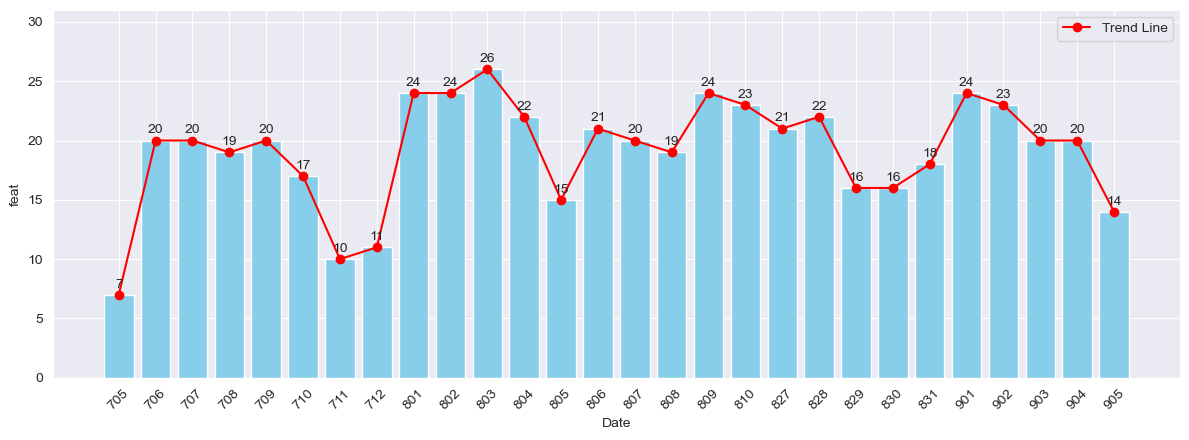

In [19]:
chosen_user_tend_change(0)

### 用户类别组成饼图

In [20]:
chosen_user_id = 6000

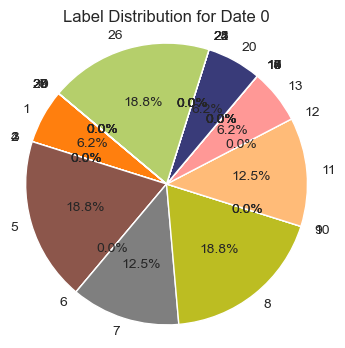

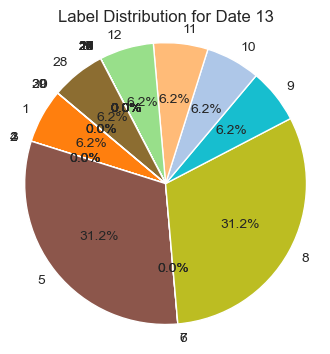

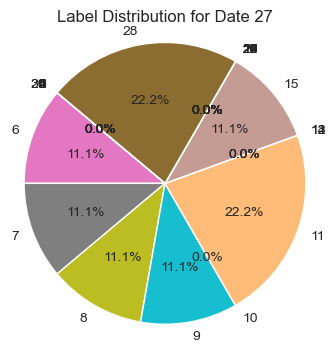

In [21]:
user_label_counts = count_label(origin_data,chosen_user_id, 1)
# 假设我们要绘制的是label_counts中第一行的数据
days = len(user_label_counts)-1
row_data_to_plot_0 = user_label_counts.iloc[0, 1:]  # 跳过第一列（日期列）
row_data_to_plot_1 = user_label_counts.iloc[days//2, 1:]  # 跳过第一列（日期列）
row_data_to_plot_2 = user_label_counts.iloc[days, 1:]  # 跳过第一列（日期列）

draw_pie(row_data_to_plot_0, figsize=(4, 4), textprops={'fontsize': 10})
draw_pie(row_data_to_plot_1, figsize=(4, 4), textprops={'fontsize': 10})
draw_pie(row_data_to_plot_2, figsize=(4, 4), textprops={'fontsize': 10})

### 平均用户覆盖度变化？
步骤：
1. 计算每个用户的类别数
2. 形成user_id,date,feat的数据表
3. 统计每个date下，每个用户对应feat的平均值？(相当于，每个user_daily_feat求和除以user_num)
4. 形成数据表，date,user_avg_feat

应该有列：date, user_id, feat_nums
最后应该：date, user_avg_feat_nums

In [22]:
#就是把系统覆盖度稍作修改
# merged_data.head()
# 展开feat列中的列表到新的行
exploded_data = merged_data.explode('feat')
# exploded_data.head()
# 按date分组，并计算每个日期的唯一feat数
feat_counts = exploded_data.groupby(['date','user_id'])['feat'].nunique().reset_index()
feat_counts.columns = ['date', 'user_id', 'unique_feats']
# 然后，计算每个date的平均feat种类数
average_feat_counts = feat_counts.groupby('date')['unique_feats'].mean().reset_index()
# sum_feat_counts = feat_counts.groupby('date')['sum_feats'].reset_index()
average_feat_counts.columns = ['date', 'user_avg_feats']
average_feat_counts['date'] -= 20200000
average_feat_counts['user_avg_feats'] = average_feat_counts['user_avg_feats'].round(1)
average_feat_counts.head()

,date,user_avg_feats
0,705,12.3
1,706,13.2
2,707,13.7
3,708,14.3
4,709,14.9


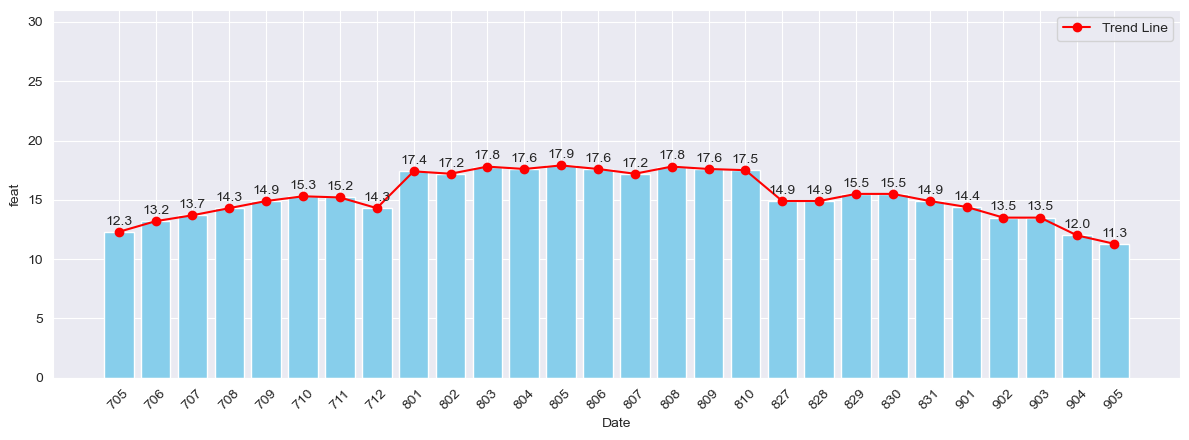

In [23]:
visual_trend_change(average_feat_counts, 0 , 31 , "date", "user_avg_feats")

### 用户in out 

绘制in-out图，以中位数为判别标准，当日内，小于类别中位数的用户判定为"in"
步骤：
1. 继承feat_counts
2. 统计每个date的feat中位数
3. 统计小于中位数的user_id个数，作为fb_user_num

In [35]:
# 1. 统计每个date中，unique_feat的中位数
median_unique_feats = feat_counts.groupby('date')['unique_feats'].median().reset_index()
median_unique_feats.columns = ['date', 'median_unique_feat']
# median_unique_feats.head()

# 2. 根据每个date中，feat的中位数，统计这一天（date）中，unique_feats小于中位数的user_id的个数
# 首先，将中位数结果与原始数据集合并
feat_counts_with_medians = pd.merge(feat_counts, median_unique_feats, on='date', how='left')
# feat_counts_with_medians.head()

# 计算每个date的总user_id数
total_user_ids = feat_counts_with_medians.groupby('date')['user_id'].nunique().reset_index()
total_user_ids.columns = ['date', 'total_user_ids']

# 然后，统计unique_feats小于中位数的user_id的个数
less_than_median_counts_df = feat_counts_with_medians.groupby('date').apply(lambda x: x[x['unique_feats'] < x['median_unique_feat']]['user_id'].nunique()).reset_index()

less_than_median_counts_df.columns = ['date', 'less_than_median_user_id_count']
percentage_less_than_median = (less_than_median_counts_df['less_than_median_user_id_count'] / total_user_ids['total_user_ids']) * 100

percentage_less_than_median_df = pd.DataFrame({'date': total_user_ids['date'], 'percentage_less_than_median': percentage_less_than_median})
# less_than_median_counts_df.describe()
less_than_median_counts_df['date'] -= 20200000
percentage_less_than_median_df['date'] -= 20200000
percentage_less_than_median_df['percentage_less_than_median'] = percentage_less_than_median_df['percentage_less_than_median'].round(1)
# less_than_median_counts_df['less_than_median_user_id_count'] /= 7175

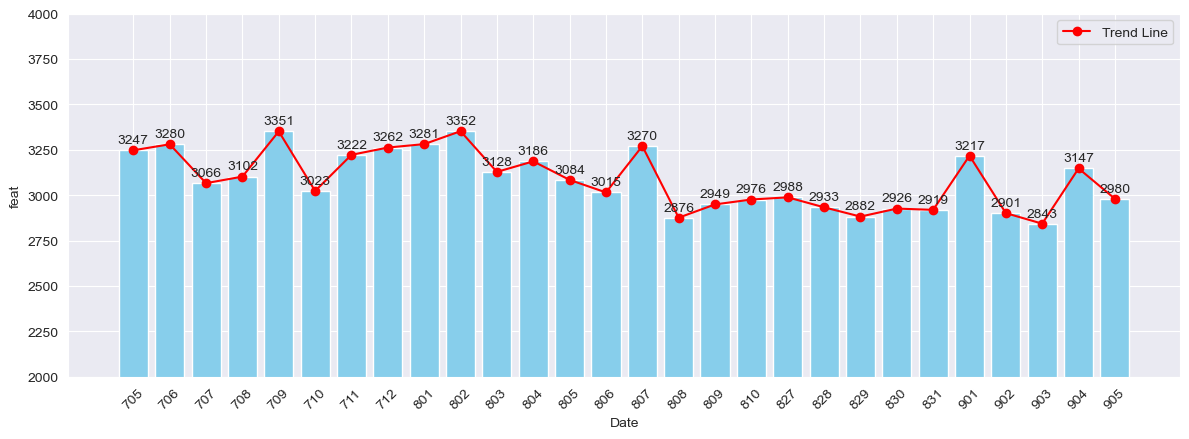

In [36]:
visual_trend_change(less_than_median_counts_df, 2000, 4000, 'date', 'less_than_median_user_id_count')

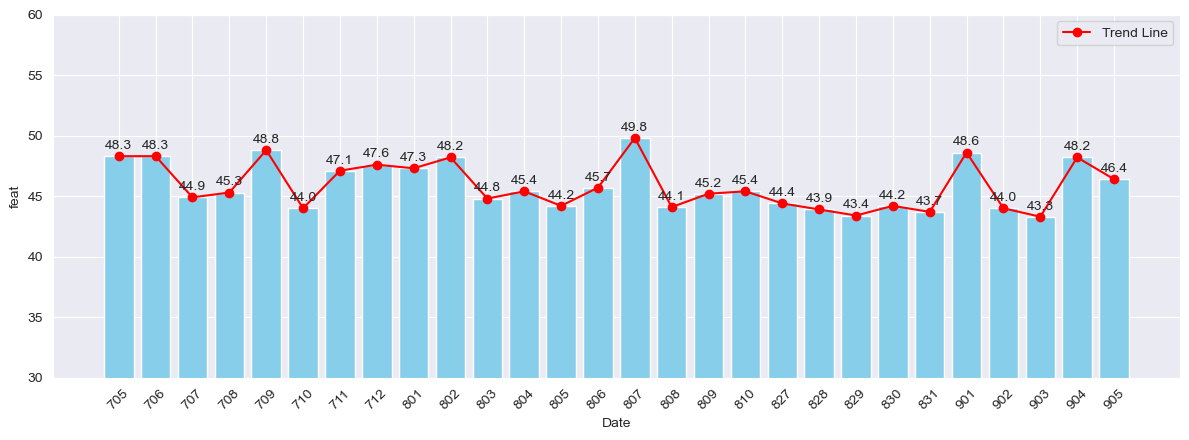

In [46]:
visual_trend_change(percentage_less_than_median_df, 30 , 60 , "date", "percentage_less_than_median")